In [1]:
from __future__ import print_function
from findSurfaceResidues import *
from pymol import cmd
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.cm import get_cmap

In [2]:
def countFrequency(my_list):
    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq

In [3]:
# plt.rcParams["figure.figsize"] = [20, 4]
plt.rcParams["figure.autolayout"] = True

In [4]:
# Arbitrary order of all 20 amino acids in full caps
amino_acid_order = [
    'ALA', 'CYS', 'ASP', 'GLU', 'PHE', 
    'GLY', 'HIS', 'ILE', 'LYS', 'LEU', 
    'MET', 'ASN', 'PRO', 'GLN', 'ARG', 
    'SER', 'THR', 'VAL', 'TRP', 'TYR'
]

Enter directory name: 1D2E
structure.pdb; progress: 1/3
alphafold.pdb; progress: 2/3
trimmed.pdb; progress: 3/3


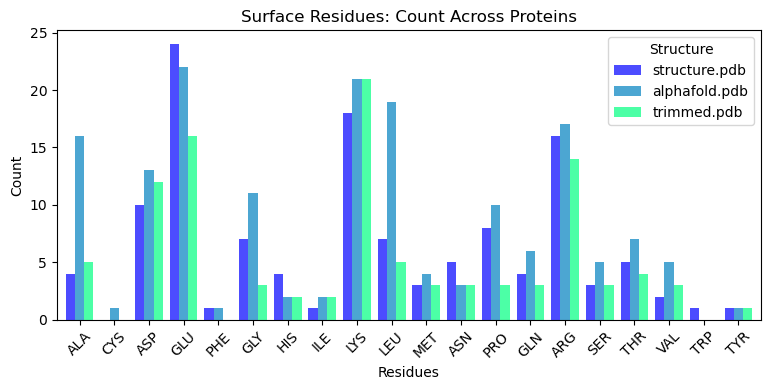

In [5]:
protein_dir = input('Enter directory name: ')
proteins = [p for p in os.listdir(protein_dir) if not p.startswith('.')]

# Initialize PyMOL
cmd.reinitialize()

# Setting up the figure for overlay plotting
plt.figure(figsize=(15, 4))

# Preparing data frames for plotting
df_counts = pd.DataFrame()
df_frequencies = pd.DataFrame()

for count, protein in enumerate(proteins):
    print(f"{protein}; progress: {count + 1}/{len(proteins)}")
    
    path = os.path.join(protein_dir, protein)
    cmd.load(path)

    residues = findSurfaceResidues(cutoff=30)
    residues = [res[2] for res in residues]  # Assuming this returns residue names

    total_residues = countTotalResidues()
    total_residues = [res[2] for res in total_residues]  # Assuming this also returns residue names

    residue_data = countFrequency(residues)
    residue_totals = countFrequency(total_residues)

    residue_freq_data = {key: residue_data.get(key, 0) / residue_totals.get(key, 1) for key in residue_totals.keys()}

    # Add data to Pandas DataFrame
    df_counts[protein] = pd.Series(residue_data).reindex(amino_acid_order)
    df_frequencies[protein] = pd.Series(residue_freq_data).reindex(amino_acid_order)

    cmd.delete('all')

# Plotting using pandas functionality
ax1 = plt.subplot(1, 2, 1)
df_counts.plot(kind='bar', ax=ax1, width=0.8, colormap='winter', alpha=0.7)
plt.title('Surface Residues: Count Across Proteins')
plt.xlabel('Residues')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Structure')

# If plotting frequencies:
# ax2 = plt.subplot(1, 2, 2)
# df_frequencies.plot(kind='bar', ax=ax2, width=0.8, colormap='winter', alpha=0.7)
# plt.title('Surface Residues: Frequency Across Proteins')
# plt.xlabel('Residues')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)
# plt.legend(title='Structure')

plt.tight_layout()

# Save the plot
plot_dir = os.path.join(protein_dir, "_graphs")
os.makedirs(plot_dir, exist_ok=True)
plt.savefig(os.path.join(plot_dir, "overlay_residues.png"))
plt.show()